In [5]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd
import math
# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn
# 小数第３まで表示
%precision 3

'%.3f'

In [4]:
df_train=pd.read_table('train.tsv')

In [12]:
df_train.count()

train_id             1482535
name                 1482535
item_condition_id    1482535
category_name        1476208
brand_name            849853
price                1482535
shipping             1482535
item_description     1482531
dtype: int64

In [34]:
print('データ次元数(X,y):{}'.format(df_train.shape))
print('欠損データの数:{}'.format(df_train['name'].isnull().sum()))

データ次元数(X,y):(1482535, 13)
欠損データの数:0


In [13]:
df_train.head(3)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [16]:
df_train['name'].value_counts()

Bundle                                     2232
Reserved                                    453
Converse                                    445
BUNDLE                                      418
Dress                                       410
Coach purse                                 404
Lularoe TC leggings                         396
Romper                                      353
Nike                                        340
Vans                                        334
American Eagle Jeans                        325
Miss Me Jeans                               284
Lularoe OS leggings                         281
ON HOLD                                     274
Coach Purse                                 258
Lularoe Irma                                254
Shorts                                      247
Michael Kors Purse                          243
Coach wallet                                242
Bundle!                                     242
Miss me jeans                           

In [37]:
df_train['brand_name'].value_counts()

PINK                    54088
Nike                    54043
Victoria's Secret       48036
LuLaRoe                 31024
Apple                   17322
FOREVER 21              15186
Nintendo                15007
Lululemon               14558
Michael Kors            13928
American Eagle          13254
Rae Dunn                12305
Sephora                 12172
Coach                   10463
Disney                  10360
Bath & Body Works       10354
Adidas                  10202
Funko                    9237
Under Armour             8461
Sony                     7994
Old Navy                 7567
Hollister                6948
Carter's                 6385
Urban Decay              6210
The North Face           6172
Independent              5902
Too Faced                5794
Xbox                     5709
Brandy Melville          5680
Kate Spade               5411
MAC                      5302
                        ...  
Shane Company               1
Storkcraft                  1
Auto Meter

In [17]:
df_train['category_name'].value_counts()

Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29910
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Women/Tops & Blouses/Tank, Cami                                20284
Women/Tops & Blouses/Blouse                                    20284
Women/Dresses/Above Knee, Mini                                 20082
Women/Jewelry/Necklaces                                        19758
Women/Athletic Apparel/Shorts                                  19528
Beauty/Makeup/Makeup Palettes                                  19103
Women/Shoes/Boots                 

In [27]:
df_train[df_train['name']=='Bundle'].describe()

,train_id,item_condition_id,price,shipping
count,2.232000e+03,2232.000000,2232.000000,2232.000000
mean,7.424668e+05,2.111111,34.504032,0.271505
std,4.288198e+05,0.903810,34.622754,0.444836
min,1.220000e+02,1.000000,4.000000,0.000000
25%,3.790398e+05,1.000000,16.000000,0.000000
50%,7.273890e+05,2.000000,24.000000,0.000000
75%,1.109448e+06,3.000000,39.000000,1.000000
max,1.482393e+06,4.000000,393.000000,1.000000


In [31]:
df_train[df_train['name']=='Bundle'].corr()

,train_id,item_condition_id,price,shipping
train_id,1.000000,-0.000886,0.012535,-0.010721
item_condition_id,-0.000886,1.000000,-0.097660,-0.193244
price,0.012535,-0.097660,1.000000,-0.010810
shipping,-0.010721,-0.193244,-0.010810,1.000000


In [36]:
df_train['price'].describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

## ターゲットの分布
まずは、ターゲットの分布を確認

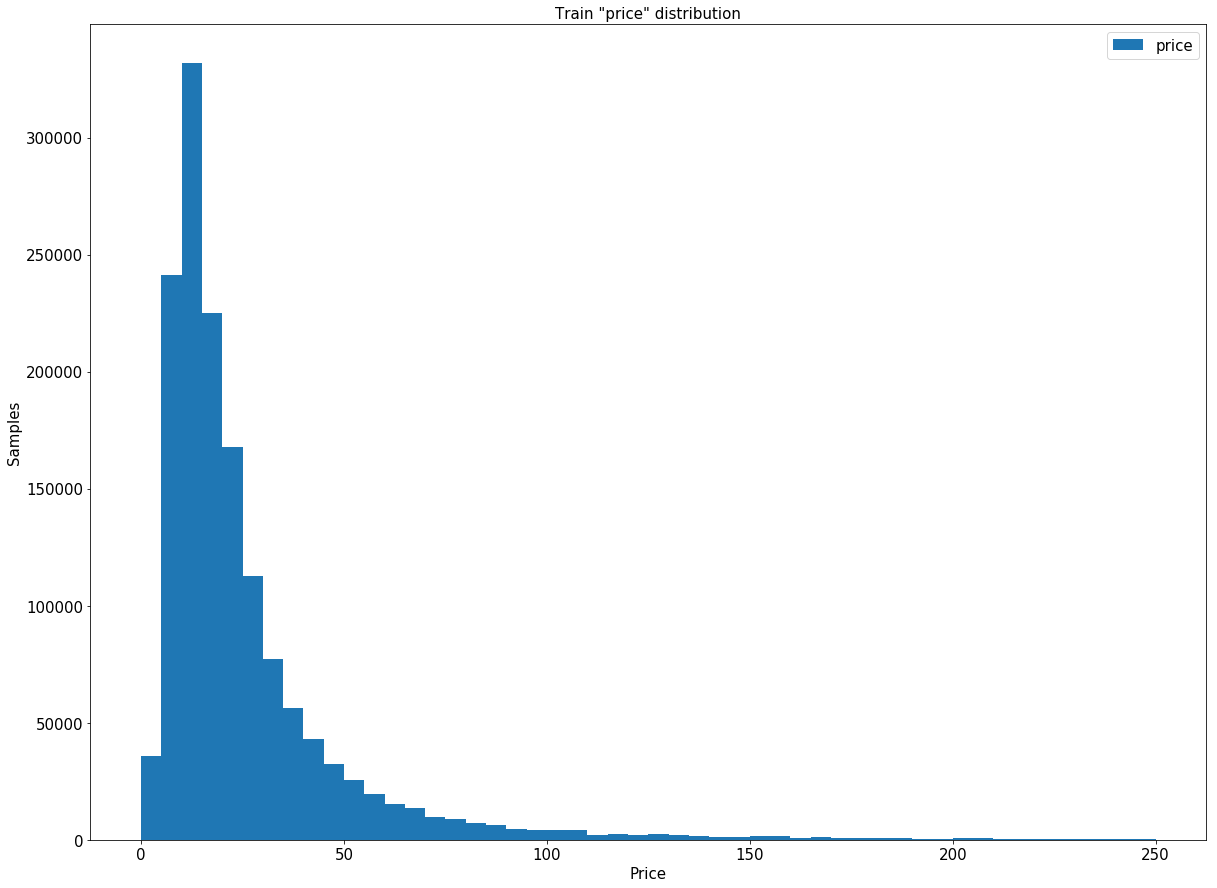

In [12]:
plt.figure(figsize=(20, 15))
plt.hist(df_train['price'], bins=50, range=[0,250], label='price')
plt.title('Train "price" distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

価格の分布は、17$近辺にピークが来て、高い側にテールを引くようなグラフになっている。

まず、shipフラグが0か1か（輸送費用を、売り手が持つか買い手が持つか）で違いがあるかを見てみる。

C:\Users\12239\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\12239\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


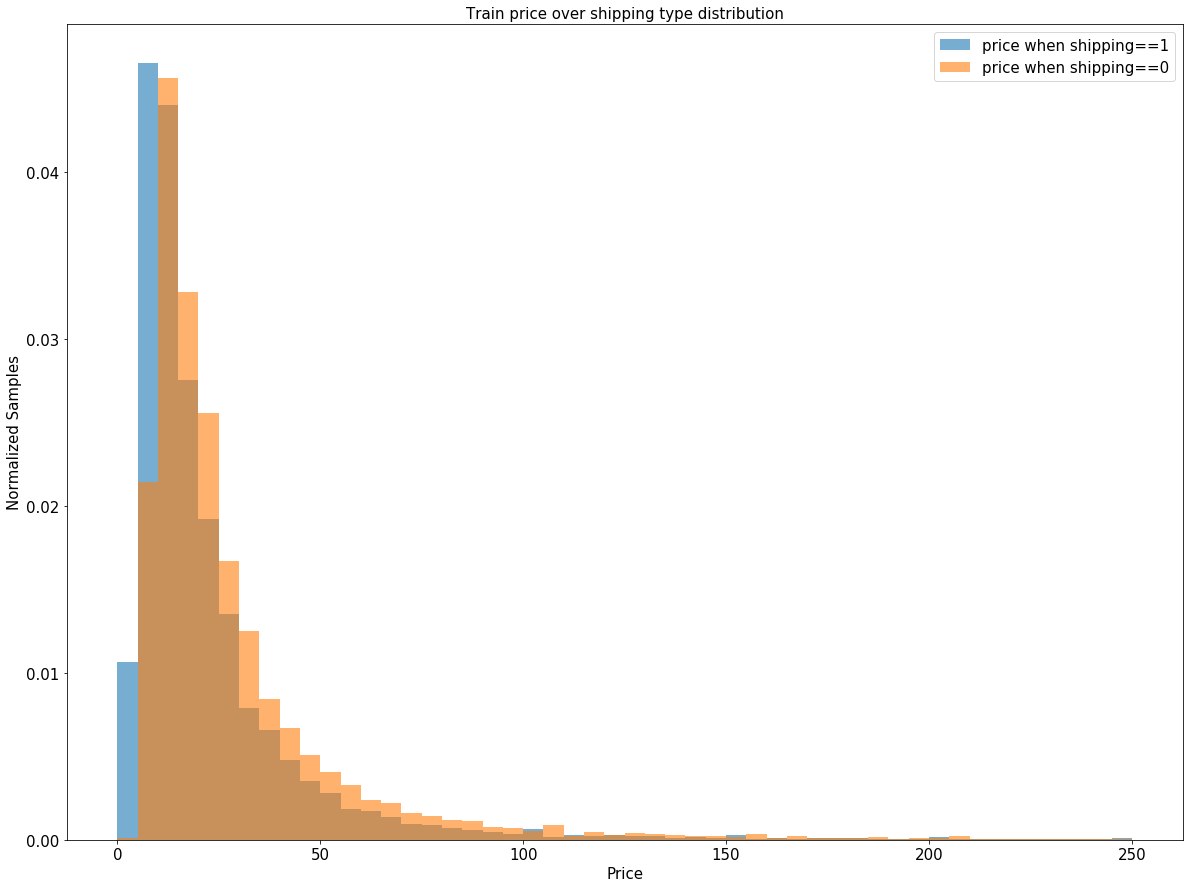

In [38]:
#shipフラグが0,1の比較
plt.figure(figsize=(20, 15))
bins=50
plt.hist(df_train[df_train['shipping']==1]['price'], bins, normed=True, range=[0,250],
         alpha=0.6, label='price when shipping==1')
plt.hist(df_train[df_train['shipping']==0]['price'], bins, normed=True, range=[0,250],
         alpha=0.6, label='price when shipping==0')
plt.title('Train price over shipping type distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Normalized Samples', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

shipが0 or 1では、価格はあまり分離できていない。

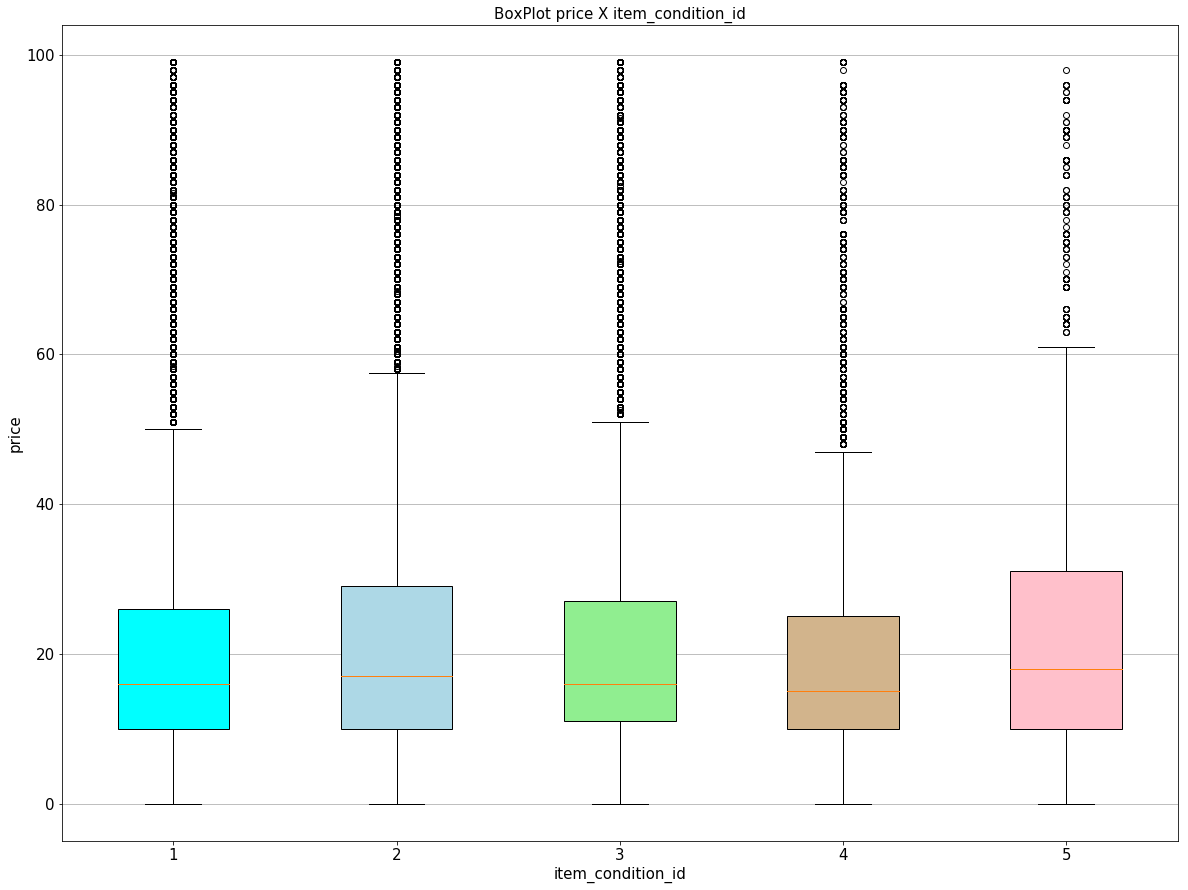

In [42]:
# item condition idによる違い
df = df_train[df_train['price']<100]

my_plot = []
for i in df_train['item_condition_id'].unique():
    my_plot.append(df[df['item_condition_id']==i]['price'])
fig, axes = plt.subplots(figsize=(20, 15))
bp = axes.boxplot(my_plot,vert=True,patch_artist=True,labels=range(1,6)) 

colors = ['cyan', 'lightblue', 'lightgreen', 'tan', 'pink']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

axes.yaxis.grid(True)

plt.title('BoxPlot price X item_condition_id', fontsize=15)
plt.xlabel('item_condition_id', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

del df

itemコンディションによる違いでも、あまり価格が分離できていない。

(-0.5, 1439.5, 1079.5, -0.5)

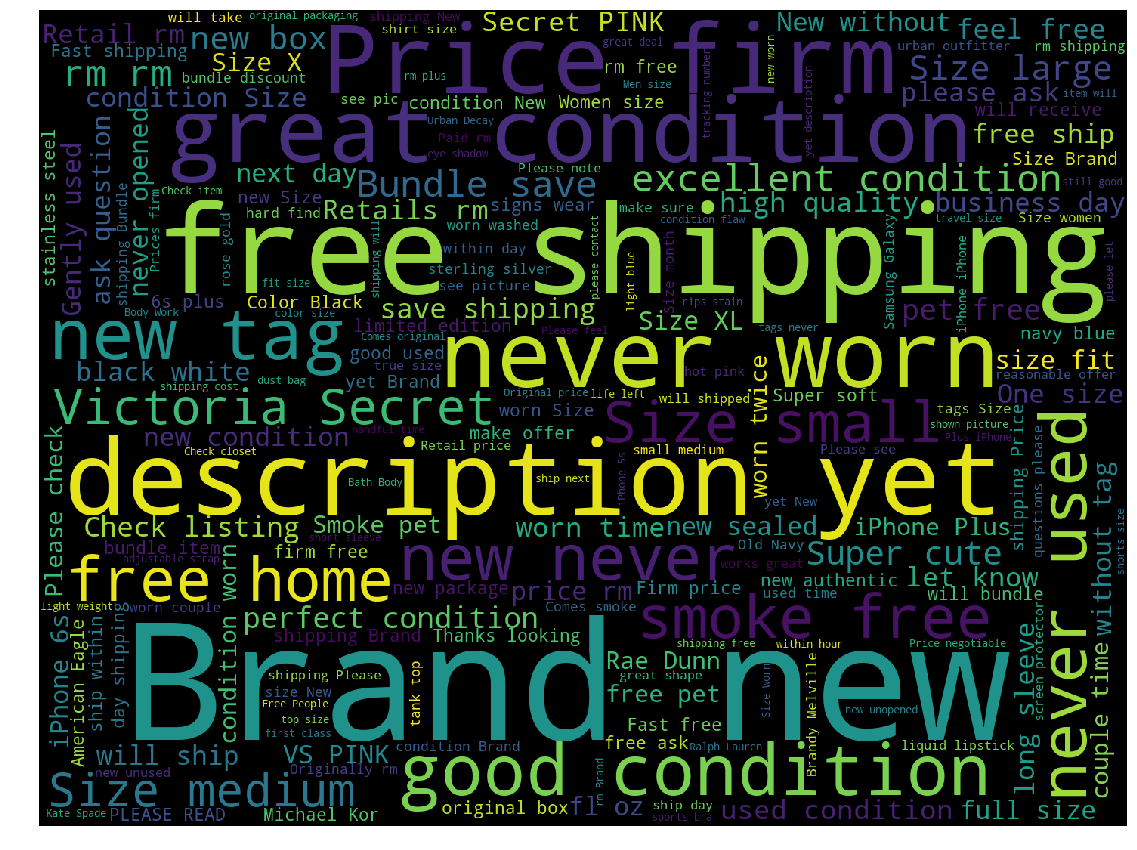

In [5]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(df_train['item_description']
.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

ワードクラウドでは、「Description Yet」（記述無）が目立つ。そこで、記述の有り無しに注目して、分布を分析してみる。

In [6]:
df_train['has_description'] = 1
df_train.loc[df_train['item_description']=='No description yet', 'has_description'] = 0

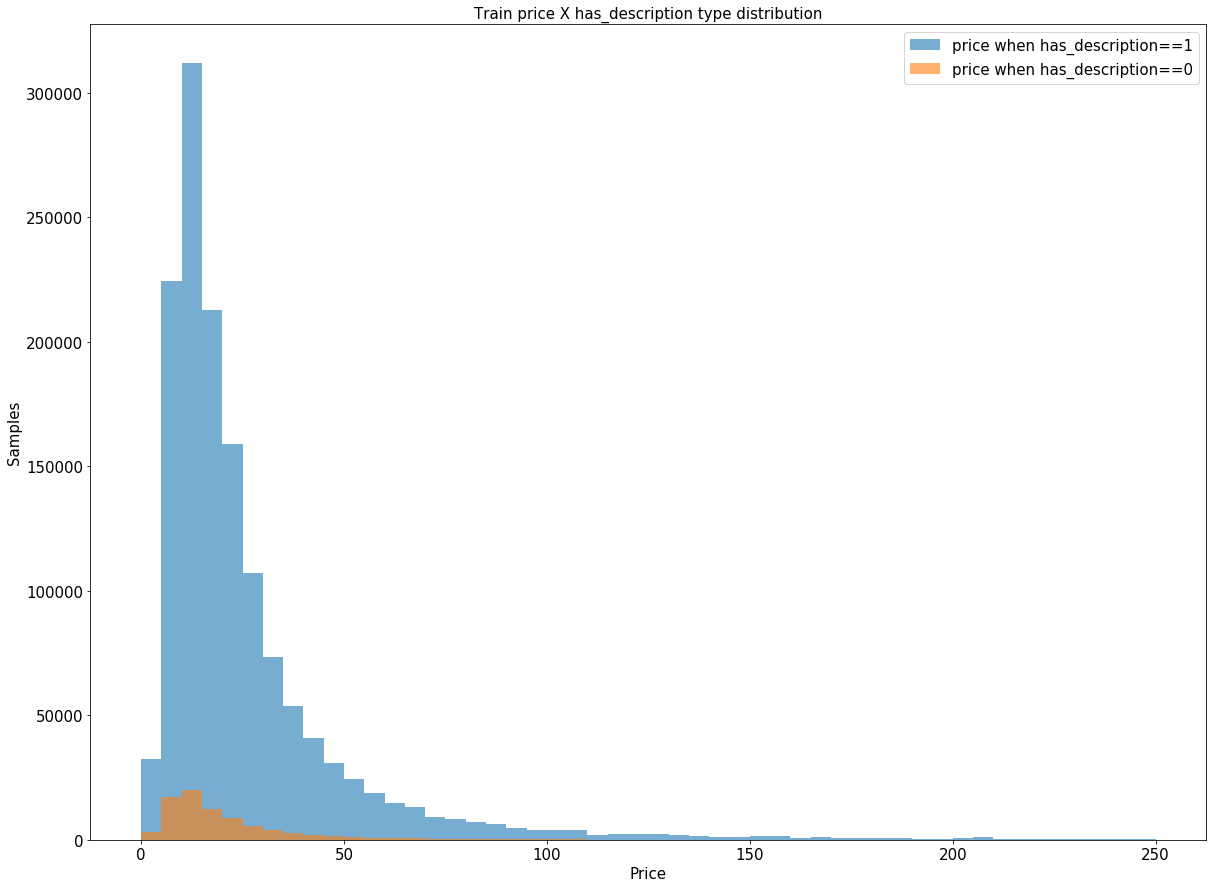

In [7]:
plt.figure(figsize=(20, 15))
bins=50
plt.hist(df_train[df_train['has_description']==1]['price'], bins, range=[0,250],
         alpha=0.6, label='price when has_description==1')
plt.hist(df_train[df_train['has_description']==0]['price'], bins, range=[0,250],
         alpha=0.6, label='price when has_description==0')
plt.title('Train price X has_description type distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

C:\Users\12239\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\12239\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


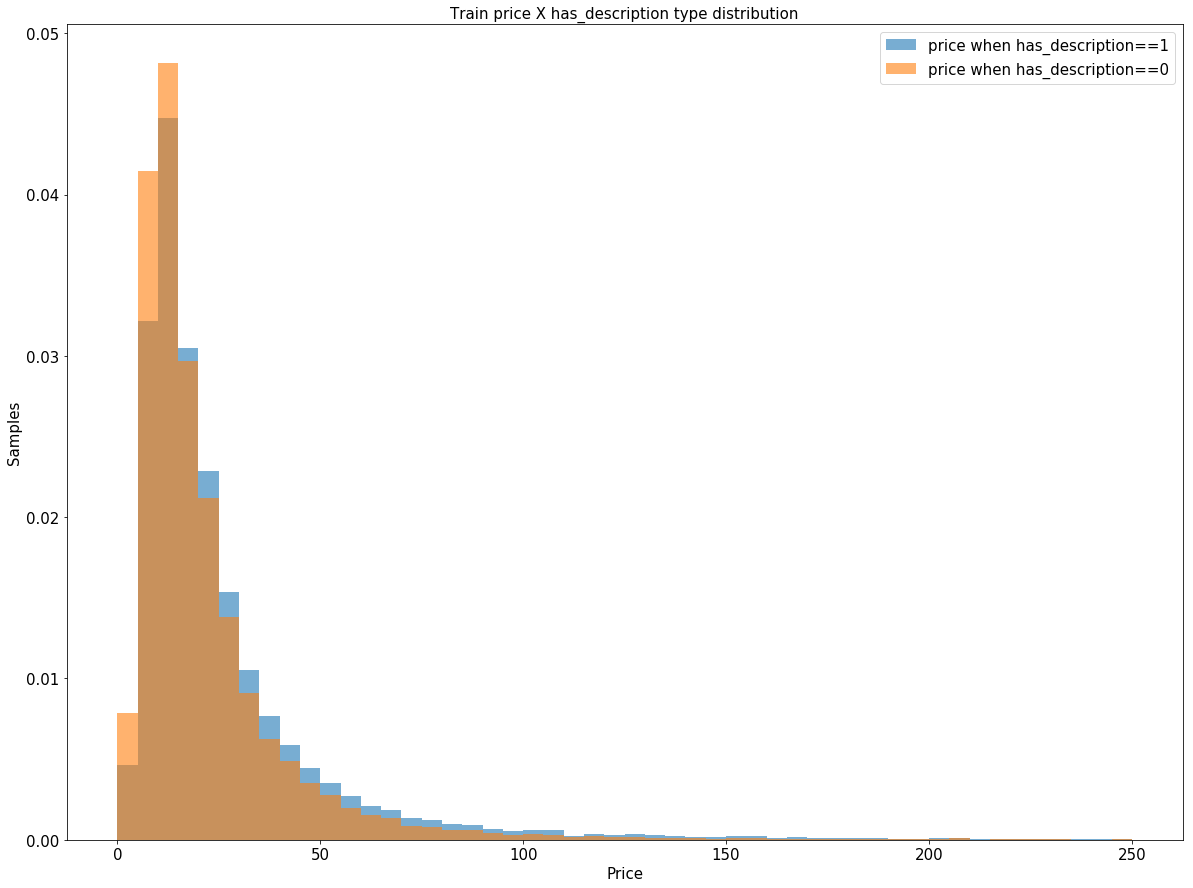

In [8]:
plt.figure(figsize=(20, 15))
bins=50
plt.hist(df_train[df_train['has_description']==1]['price'], bins, normed=True,range=[0,250],
         alpha=0.6, label='price when has_description==1')
plt.hist(df_train[df_train['has_description']==0]['price'], bins, normed=True,range=[0,250],
         alpha=0.6, label='price when has_description==0')
plt.title('Train price X has_description type distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

正規化して比較すると、やはり価格はうまく分離は出来ていない。

In [30]:
df_train['good_description'] = 0
df_train.loc[df_train['item_description']=='Brand new', 'good_description'] = 1
df_train.loc[df_train['item_description']=='great condition', 'good_description'] = 1
df_train.loc[df_train['item_description']=='good condition', 'good_description'] = 1
df_train.loc[df_train['item_description']=='never worn', 'good_description'] = 1
df_train.loc[df_train['item_description']=='never used', 'good_description'] = 1

C:\Users\12239\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\12239\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


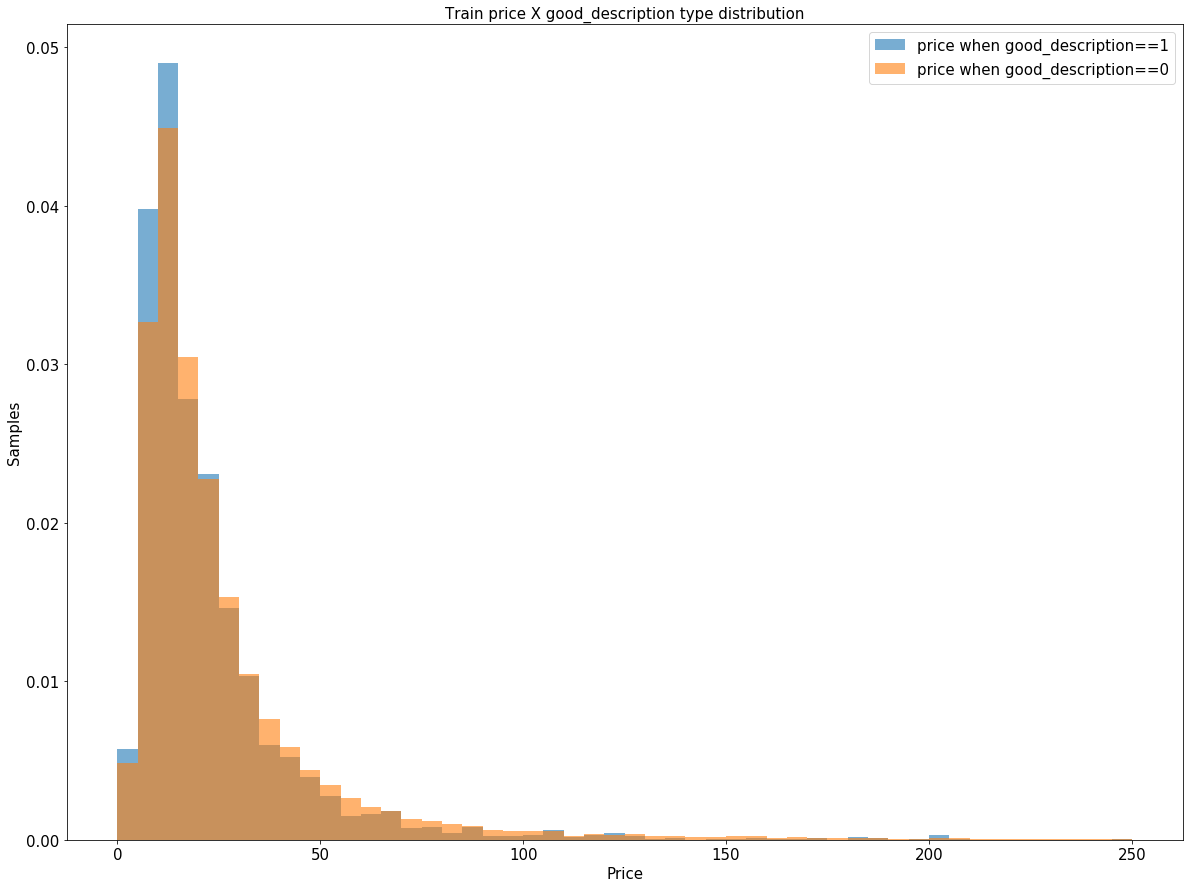

In [31]:
plt.figure(figsize=(20, 15))
bins=50
plt.hist(df_train[df_train['good_description']==1]['price'], bins, normed=True,range=[0,250],
         alpha=0.6, label='price when good_description==1')
plt.hist(df_train[df_train['good_description']==0]['price'], bins, normed=True,range=[0,250],
         alpha=0.6, label='price when good_description==0')
plt.title('Train price X good_description type distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

## TF-IDF

tf-idfとは、tfという概念とidfという概念を組み合わせたものなのですが、 大雑把に言いますとレアな単語が何回も出てくるようなら、文書を分類する際にその単語の重要度を上げるというものです。 なので、まずtfという概念について説明したのち、idfという概念について説明しようと思います。


「tf」は（Term Frequency）の略です。 直訳すると「単語の出現頻度」で、「各文書においてその単語がどのくらい出現したのか」を意味します。 （よく出現する単語は、その文書の特徴を判別するのに有用！）
$$
\begin{equation}
 tf=文書Aにおける単語Xの出現頻度 / 文書Aにおける全単語の出現頻度の和 
\end{equation}
$$
「idf」は（Inverse Document Frequency）の略です。 これは「逆文書頻度」と呼ばれており、単語が「レア」なら高い値を、「色々な文書によく出現する単語」なら低い値を示すものです。 （レアな単語は、その文書の特徴を判別するのに有用！）

\begin{equation}
 idf=log(全文書数単語Xを含む文書数)
\end{equation}

(logを使っているのは、文書数の規模に応じた変動影響を緩和するためです。） (右辺に１を足す場合もあります。これはidfが0にならないようにするためです)

ここまでをまとめますと「tf」、「idf」の意味については下記のようだと解釈できます。 tf:その文書においてどの単語がどれくらい出現したのか idf:各単語のレア度を示す 「tf-idf」はこの２つの概念を組み合わせたものです。つまり、
\begin{equation}
tfidf=tf∗idf
\end{equation}
と表現できます。
(本来なtf-idfと表記するべきところを、markdownでハイフンを記述すると引き算と判別されてしまい誤解を生みかねないので、ここではtfidfと表記します) 
 これを上記の説明を使うと、
\begin{equation}
tfidf=(単語の出現頻度)∗(各単語のレア度)
\end{equation}
という解釈ができます。 これは「その単語がよく出現するほど」、「その単語がレアなほど」大きい値を示すものになります。 

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import string

def compute_tfidf(description):
    description = str(description)
    description.translate(string.punctuation)

    tfidf_sum=0
    words_count=0
    for w in description.lower().split():
        words_count += 1
        if w in tfidf_dict:
            tfidf_sum += tfidf_dict[w]
    
    if words_count > 0:
        return tfidf_sum/words_count
    else:
        return 0

tfidf = TfidfVectorizer(
    min_df=5, strip_accents='unicode', lowercase =True,
    analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, 
    smooth_idf=True, sublinear_tf=True, stop_words='english')


In [13]:
tfidf.fit_transform(df_train['item_description'].apply(str))
tfidf_dict = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
df_train['tfidf'] = df_train['item_description'].apply(compute_tfidf)

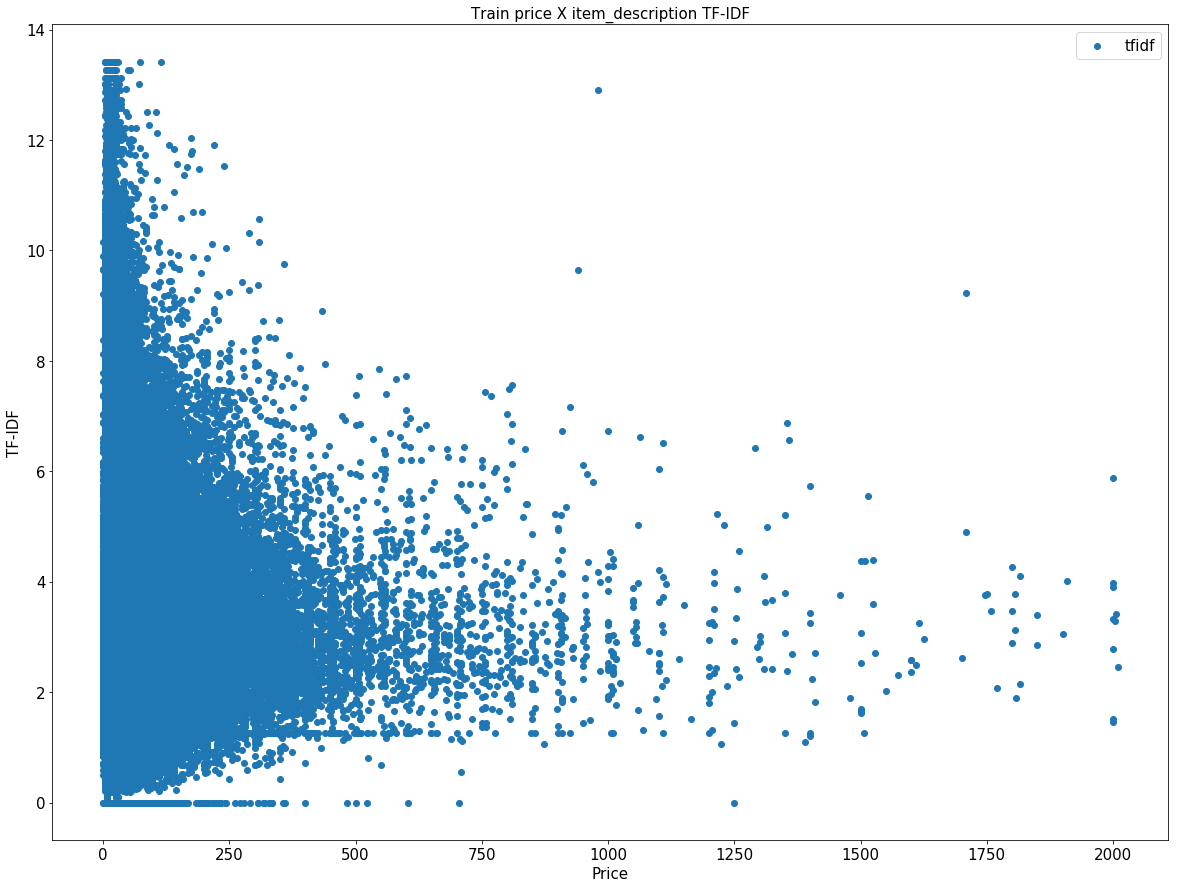

In [14]:
plt.figure(figsize=(20, 15))
plt.scatter(df_train['price'], df_train['tfidf'])
plt.title('Train price X item_description TF-IDF', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('TF-IDF', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

TF-IDFの値が大きいと、価格は低いほうに収束する傾向がある。価格予測に使えるfeatureかもしれない。

## Item Descriptionの長さ
文字数

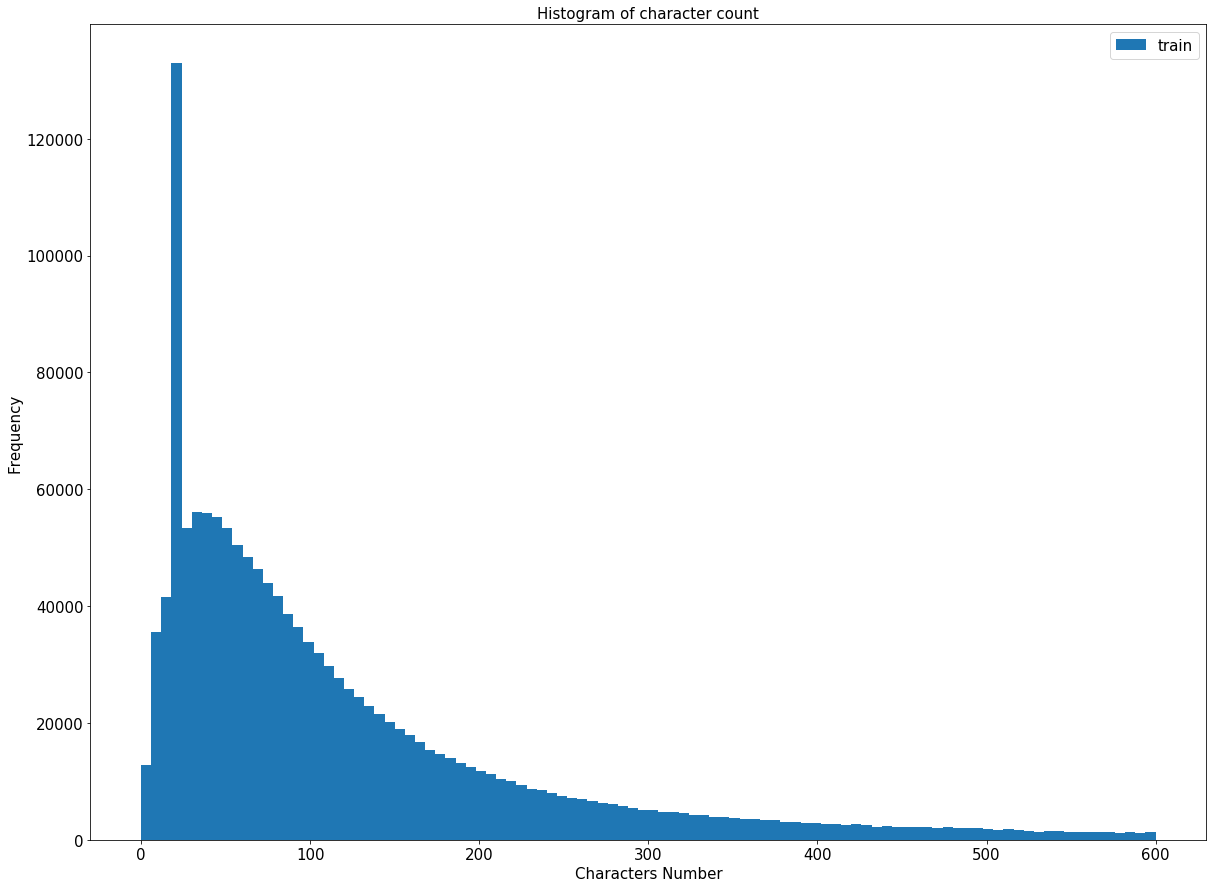

In [16]:
train_ds = pd.Series(df_train['item_description'].tolist()).astype(str)
#test_ds = pd.Series(df_test['item_description'].tolist()).astype(str#＃est_ds = pd.Series(df_test['item_description'].tolist()).astype(str＃st_ds = pd.Series(df_test['item_description'].tolist()).astype(str#＃est_ds = pd.Series(df_test['item_description'].tolist()).astype(str#＃est_ds = pd.Series(df_test['item_description'].tolist()).astype(str#＃est_ds = pd.Series(df_test['item_description'].tolist()).astype(str＃st_ds = pd.Series(df_test['item_description'].tolist()).astype(str#＃est_ds = pd.Series(df_test['item_description'].tolist()).astype(str＃st_ds = pd.Series(df_test['item_description'].tolist()).astype(str#＃est_ds = pd.Series(df_test['item_description'].tolist()).astype(str＃st_ds = pd.Series(df_test['item_description'].tolist()).astype(str#＃est_ds = pd.Series(df_test['item_description'].tolist()).astype(str#＃est_ds = pd.Series(df_test['item_description'].tolist()).astype(str#＃est_ds = pd.Series(df_test['item_description'].tolist()).astype(str＃st_ds = pd.Series(df_test['item_description'].tolist()).astype(str#＃est_ds = pd.Series(df_test['item_description'].tolist()).astype(str)

bins=100
plt.figure(figsize=(20, 15))
plt.hist(train_ds.apply(len), bins, range=[0,600], label='train')
#plt.hist(test_ds.apply(len), bins, alpha=0.6,range=[0,600], label='test')
plt.title('Histogram of character count', fontsize=15)
plt.xlabel('Characters Number', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

単語数

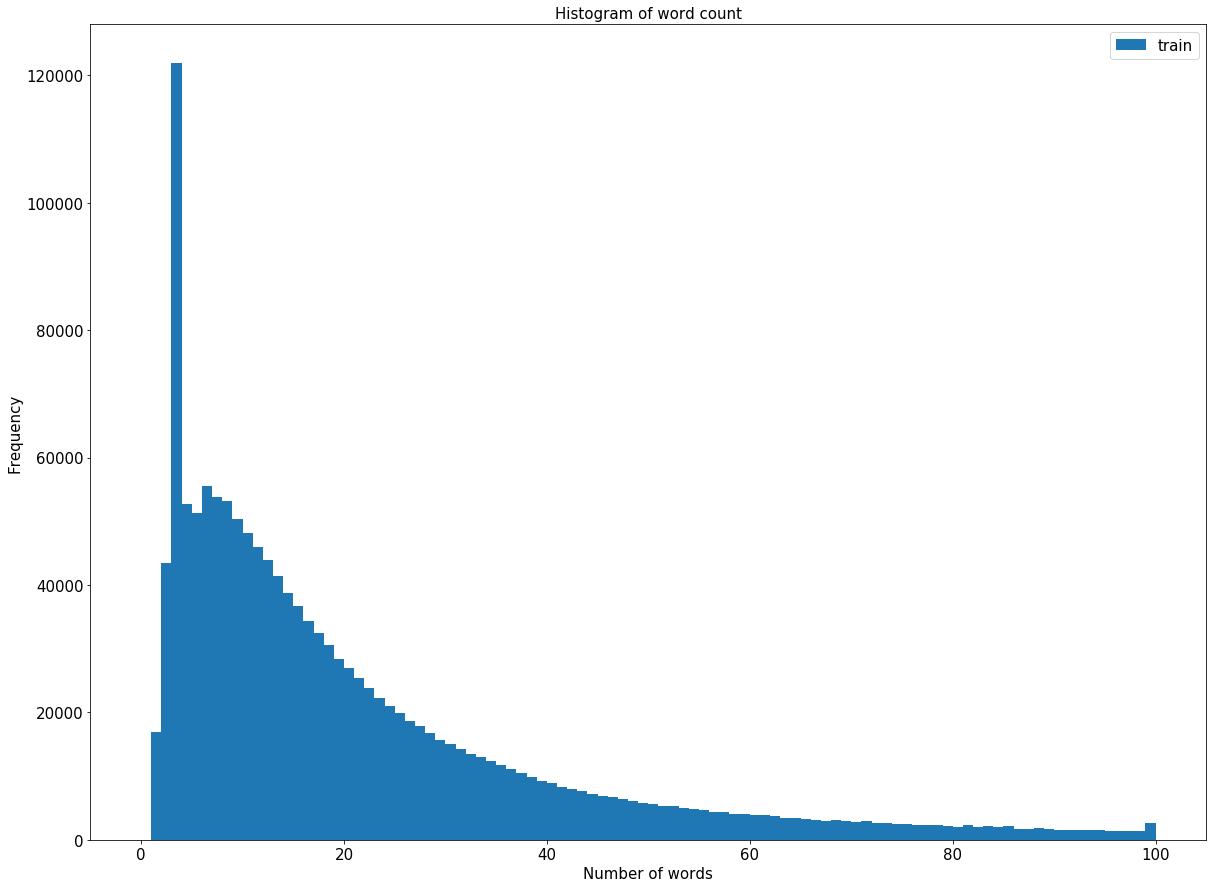

In [17]:
bins=100
plt.figure(figsize=(20, 15))
plt.hist(train_ds.apply(lambda x: len(x.split())), bins, range=[0,100], label='train')
#plt.hist(test_ds.apply(lambda x: len(x.split())), bins, alpha=0.6,range=[0,100], label='test')
plt.title('Histogram of word count', fontsize=15)
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

文字数、単語数共に右にロングテールを引くような分布になっているが、２０文字前後、３単語のところにスパイクが出ている。これは、"no description yet"ではないかと推察できる。

## category Name
カテゴリーによる価格の影響度を見る。
カテゴリーは３つのレイヤに分かれているので、それぞれmain, sub1, sub2と名付けて、価格との関係を見る。

In [18]:
def transform_category_name(category_name):
    try:
        main, sub1, sub2= category_name.split('/')
        return main, sub1, sub2
    except:
        return np.nan, np.nan, np.nan

df_train['category_main'], df_train['category_sub1'], df_train['category_sub2'] = zip(*df_train['category_name'].apply(transform_category_name))

In [19]:
main_categories = [c for c in df_train['category_main'].unique() if type(c)==str]
categories_sum=0
for c in main_categories:
    categories_sum+=100*len(df_train[df_train['category_main']==c])/len(df_train)
    print('{:25}{:3f}% of training data'.format(c, 100*len(df_train[df_train['category_main']==c])/len(df_train)))
print('nan\t\t\t {:3f}% of training data'.format(100-categories_sum))

Men                      6.297524% of training data
Electronics              8.069354% of training data
Women                    44.814119% of training data
Home                     4.578037% of training data
Sports & Outdoors        1.641175% of training data
Vintage & Collectibles   3.138543% of training data
Beauty                   14.018421% of training data
Other                    3.059017% of training data
Kids                     11.580772% of training data
Handmade                 2.080221% of training data
nan			 0.722816% of training data


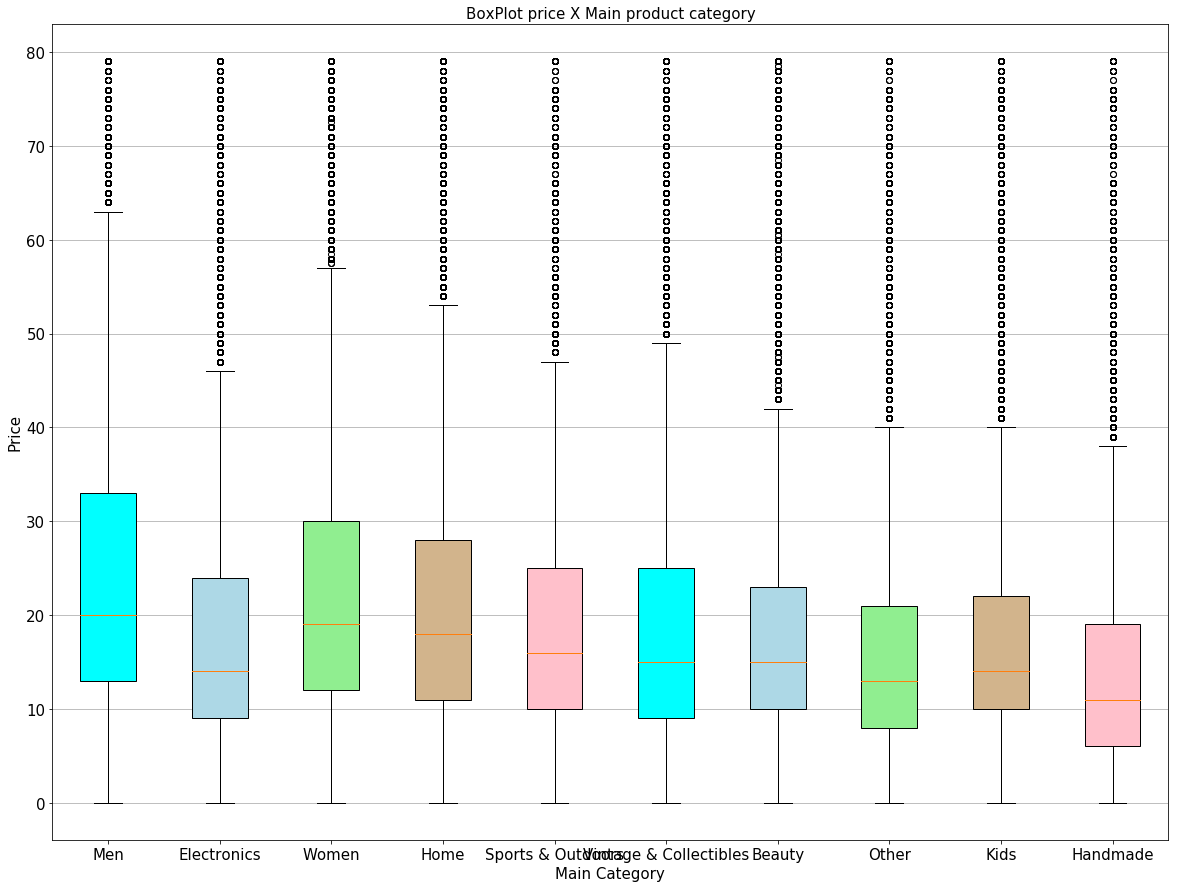

In [20]:
df = df_train[df_train['price']<80]

my_plot = []
for i in main_categories:
    my_plot.append(df[df['category_main']==i]['price'])
    
fig, axes = plt.subplots(figsize=(20, 15))
bp = axes.boxplot(my_plot,vert=True,patch_artist=True,labels=main_categories) 

colors = ['cyan', 'lightblue', 'lightgreen', 'tan', 'pink']*2
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

axes.yaxis.grid(True)

plt.title('BoxPlot price X Main product category', fontsize=15)
plt.xlabel('Main Category', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

メインカテゴリと価格はそれなりに関連はありそうに見える。例えば、Menの中央値は一番高く、Handmadeは低い。

### ２番目のサブカテゴリ
２番目のサブカテゴリの価格平均値との関係を見る。

The data has 114 unique 2nd level categories


No handles with labels found to put in legend.


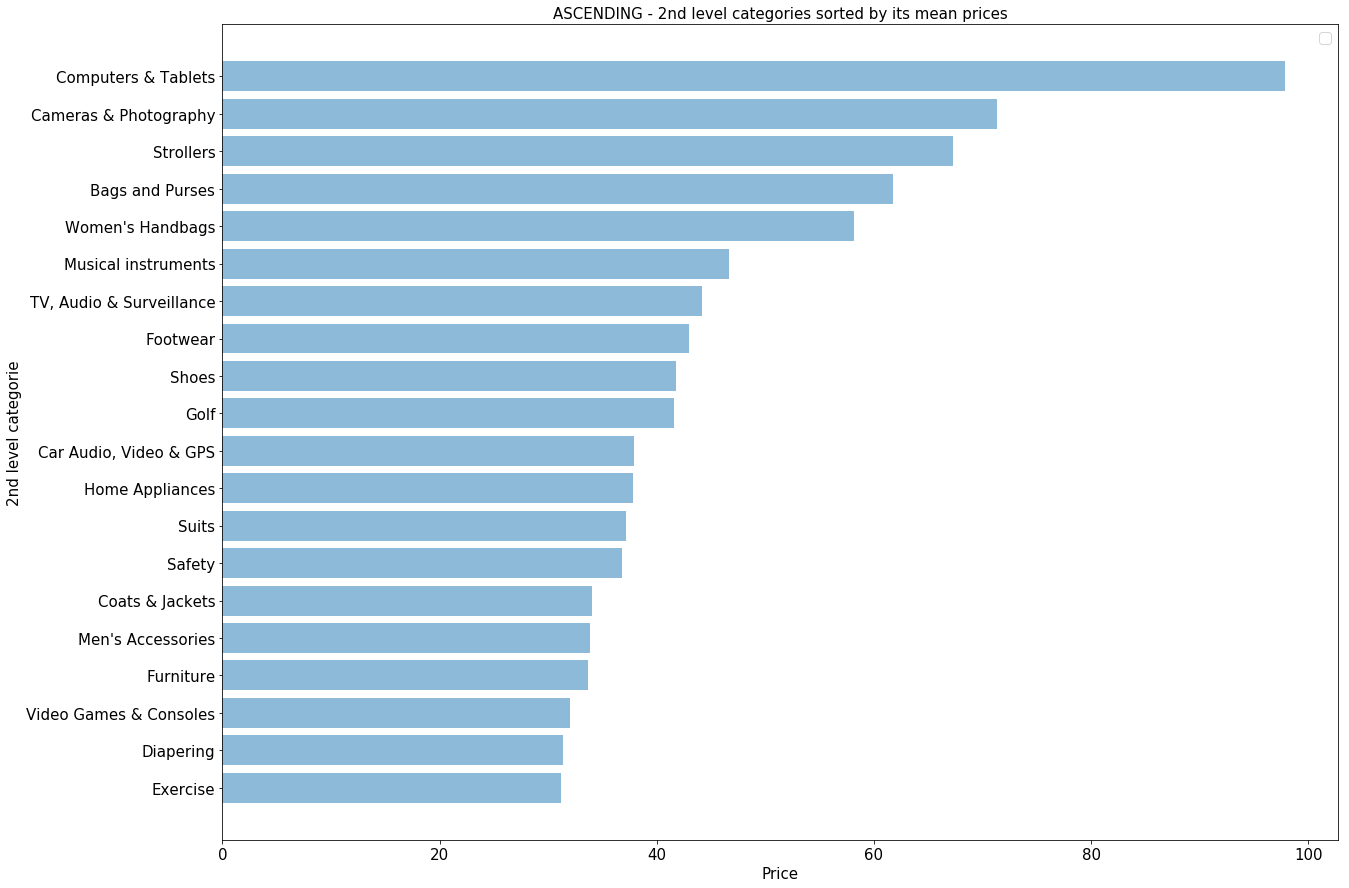

No handles with labels found to put in legend.


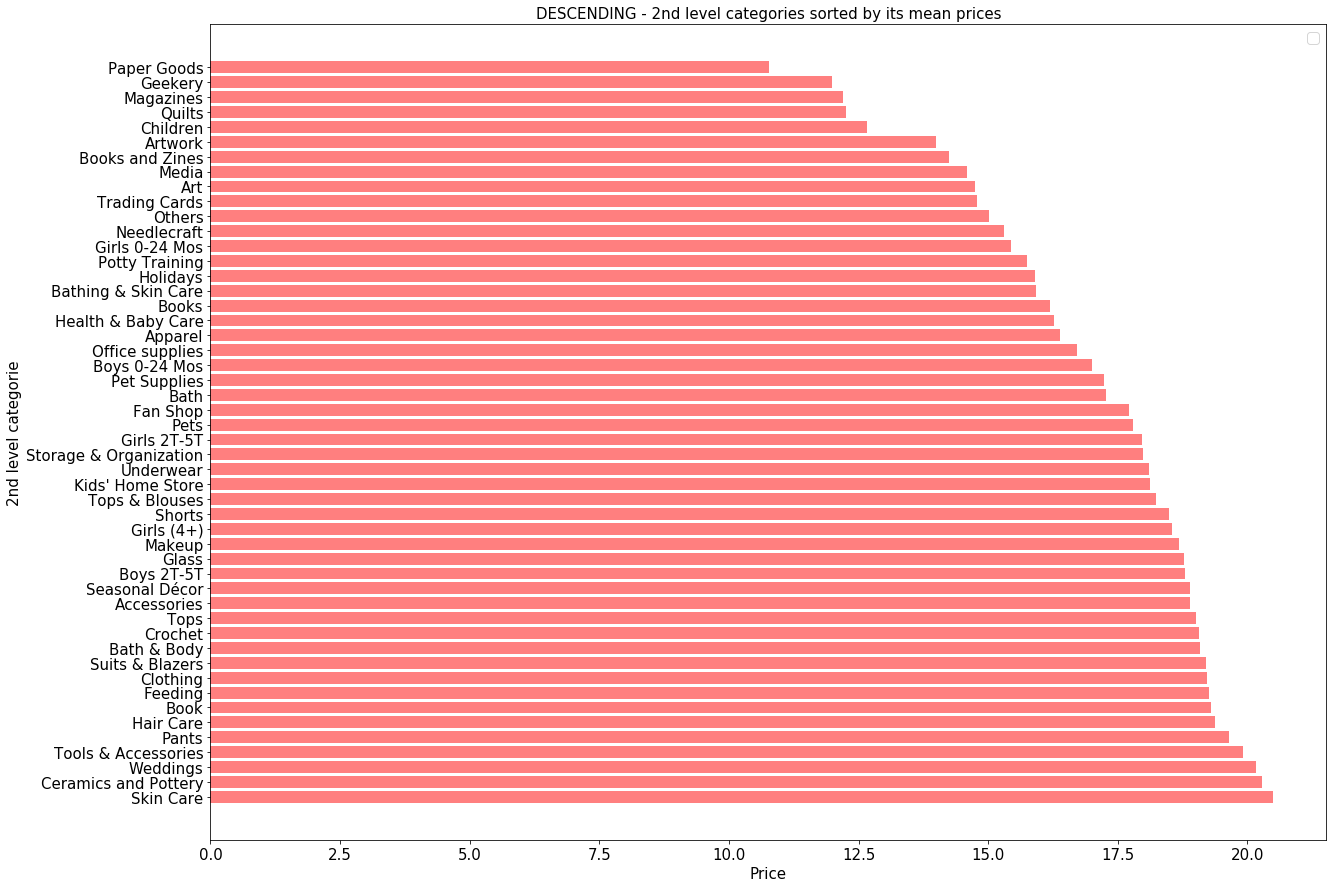

In [24]:
print('The data has {} unique 2nd level categories'.format(len(df_train['category_sub1'].unique())))

df = df_train.groupby(['category_sub1'])['price'].agg(['size','sum'])
df['mean_price']=df['sum']/df['size']
df.sort_values(by=['mean_price'], ascending=False, inplace=True)
df = df[:20]
df.sort_values(by=['mean_price'], ascending=True, inplace=True)

plt.figure(figsize=(20, 15))
plt.barh(range(0,len(df)), df['mean_price'], align='center', alpha=0.5)
plt.yticks(range(0,len(df)), df.index, fontsize=15)
plt.xticks(fontsize=15)
plt.title('ASCENDING - 2nd level categories sorted by its mean prices', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('2nd level categorie', fontsize=15)
plt.legend(fontsize=15)
plt.show()
########################################################################

df = df_train.groupby(['category_sub1'])['price'].agg(['size','sum'])
df['mean_price']=df['sum']/df['size']
df.sort_values(by=['mean_price'], ascending=True, inplace=True)
df = df[:50]
df.sort_values(by=['mean_price'], ascending=False, inplace=True)

plt.figure(figsize=(20, 15))
plt.barh(range(0,len(df)), df['mean_price'], align='center', alpha=0.5, color='r')
plt.yticks(range(0,len(df)), df.index, fontsize=15)
plt.xticks(fontsize=15)
plt.title('DESCENDING - 2nd level categories sorted by its mean prices', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('2nd level categorie', fontsize=15)
plt.legend(fontsize=15)
plt.show()

### 3番目のサブカテゴリとの関係
３番目のサブカテゴリとの関係を同じように見てみる。

The data has 865 unique 3rd level categories


No handles with labels found to put in legend.


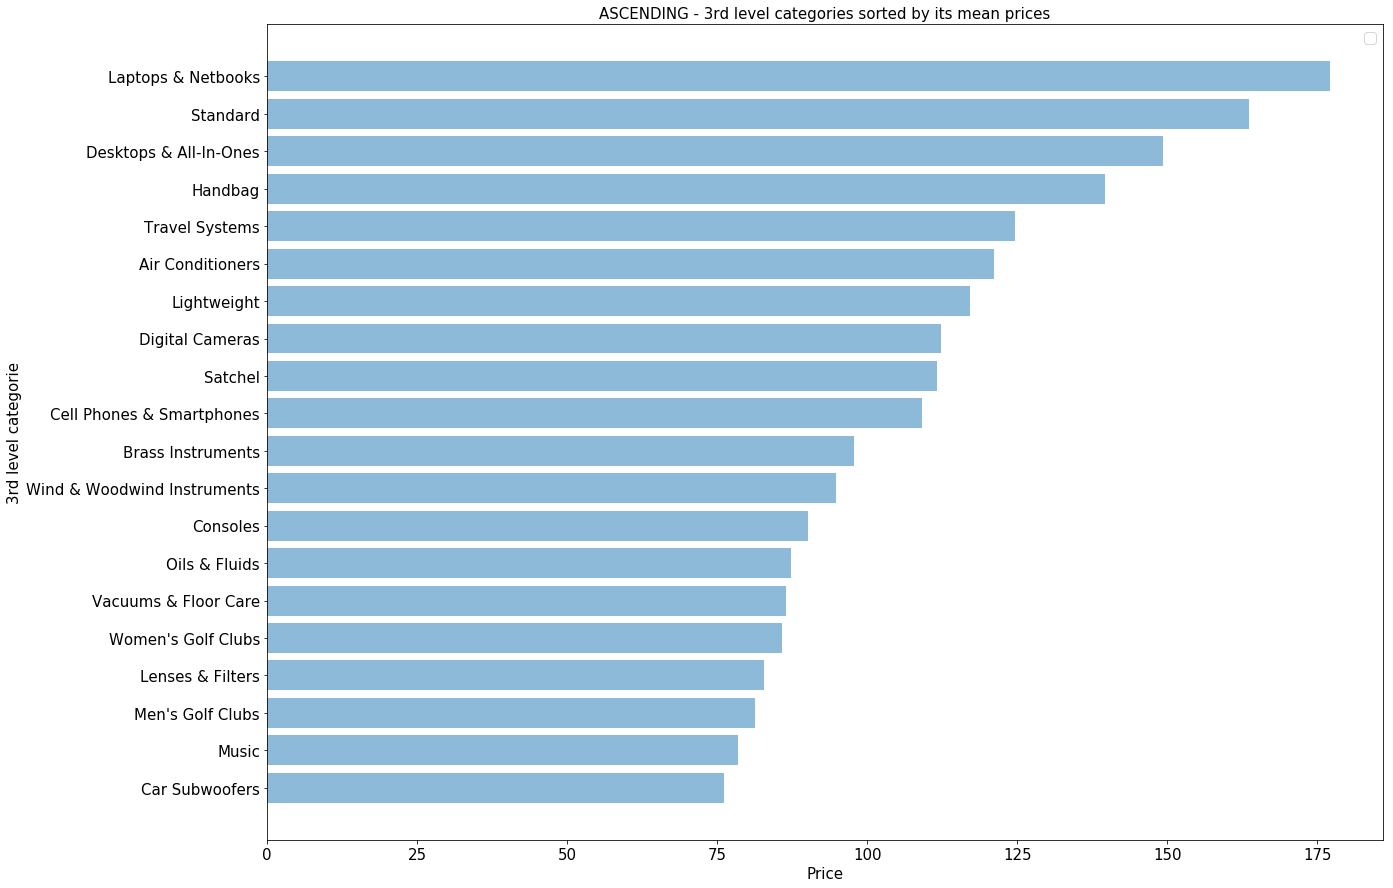

No handles with labels found to put in legend.


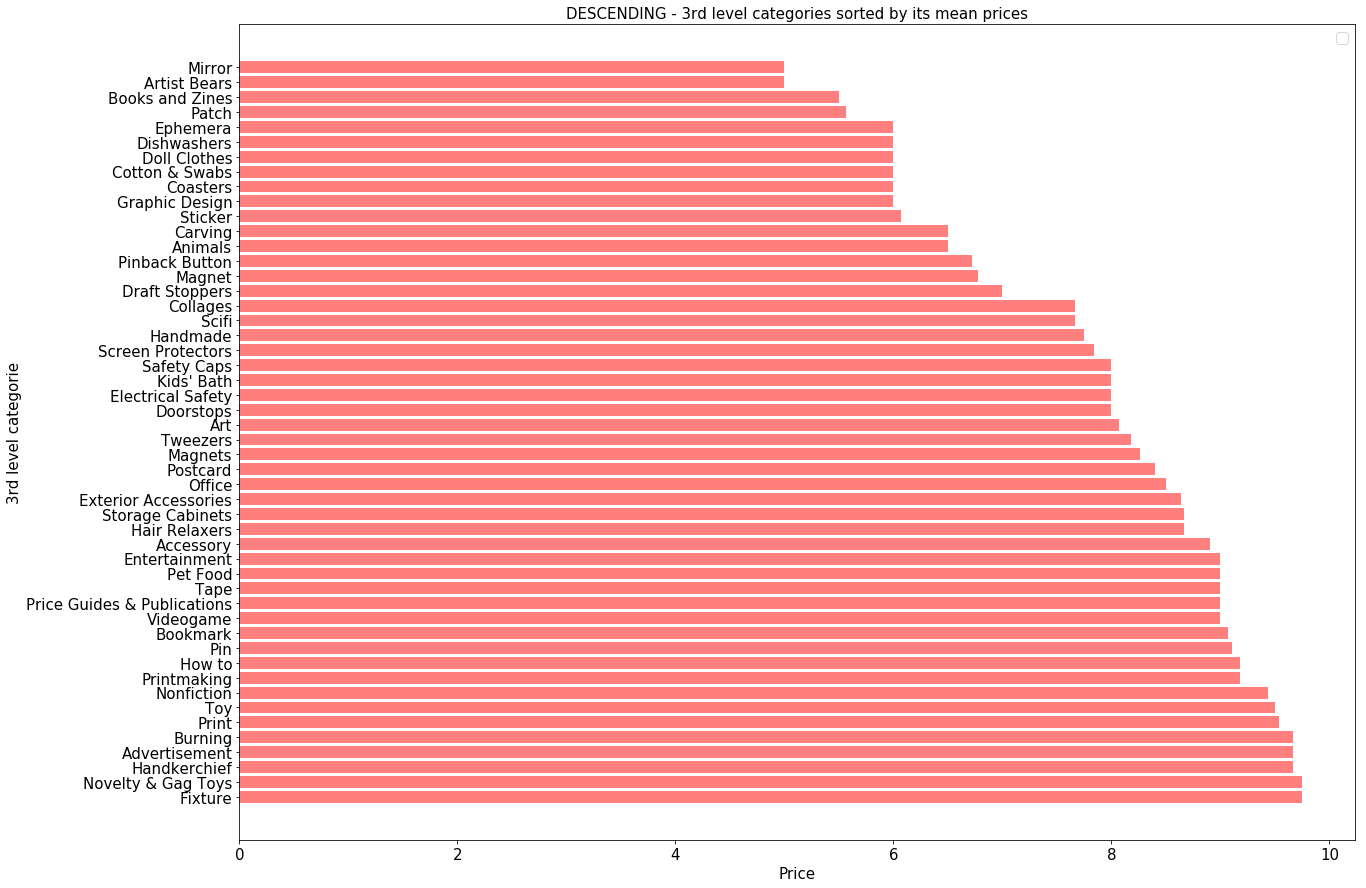

In [25]:
print('The data has {} unique 3rd level categories'.format(len(df_train['category_sub2'].unique())))

df = df_train.groupby(['category_sub2'])['price'].agg(['size','sum'])
df['mean_price']=df['sum']/df['size']
df.sort_values(by=['mean_price'], ascending=False, inplace=True)
df = df[:20]
df.sort_values(by=['mean_price'], ascending=True, inplace=True)

plt.figure(figsize=(20, 15))
plt.barh(range(0,len(df)), df['mean_price'], align='center', alpha=0.5)
plt.yticks(range(0,len(df)), df.index, fontsize=15)
plt.xticks(fontsize=15)
plt.title('ASCENDING - 3rd level categories sorted by its mean prices', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('3rd level categorie', fontsize=15)
plt.legend(fontsize=15)
plt.show()
########################################################################

df = df_train.groupby(['category_sub2'])['price'].agg(['size','sum'])
df['mean_price']=df['sum']/df['size']
df.sort_values(by=['mean_price'], ascending=True, inplace=True)
df = df[:50]
df.sort_values(by=['mean_price'], ascending=False, inplace=True)

plt.figure(figsize=(20, 15))
plt.barh(range(0,len(df)), df['mean_price'], align='center', alpha=0.5, color='r')
plt.yticks(range(0,len(df)), df.index, fontsize=15)
plt.xticks(fontsize=15)
plt.title('DESCENDING - 3rd level categories sorted by its mean prices', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('3rd level categorie', fontsize=15)
plt.legend(fontsize=15)
plt.show()

## nameとの関係

The data has 1225273 unique names


No handles with labels found to put in legend.


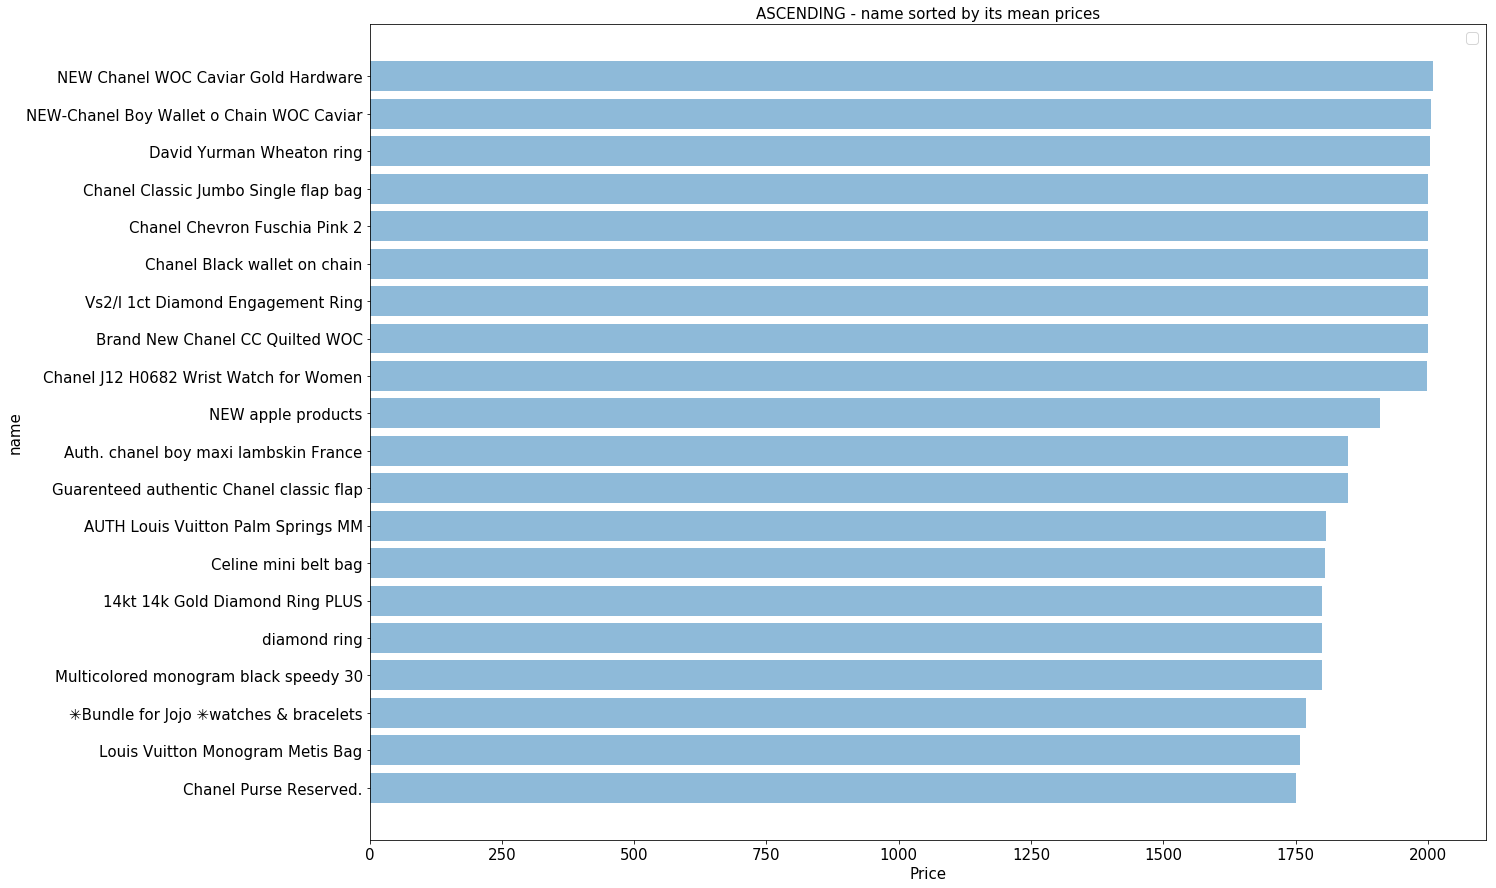

No handles with labels found to put in legend.


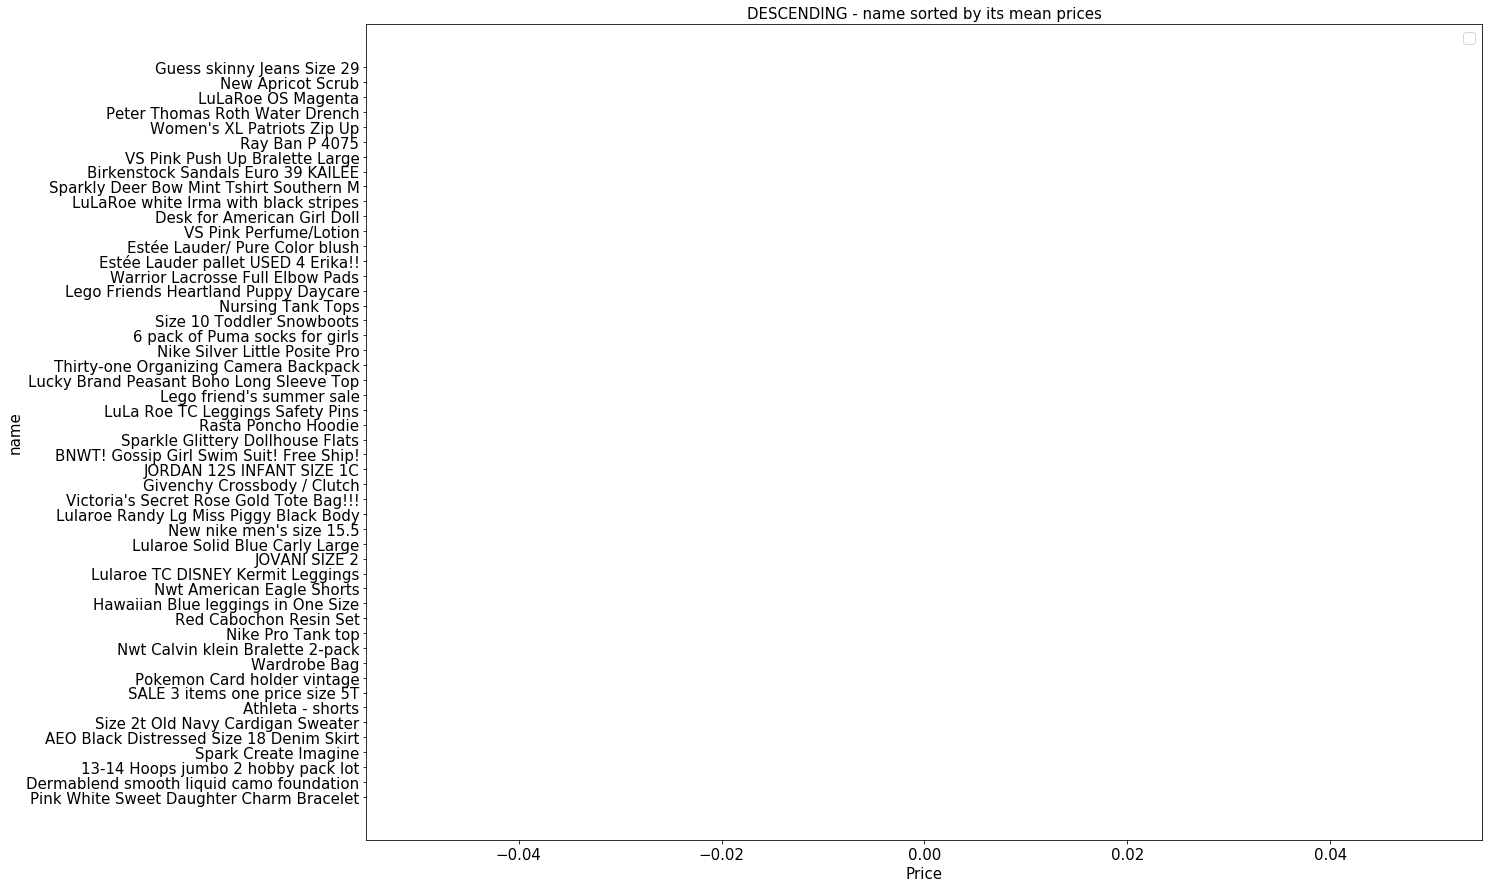

In [33]:
print('The data has {} unique names'.format(len(df_train['name'].unique())))

df = df_train.groupby(['name'])['price'].agg(['size','sum'])
df['mean_price']=df['sum']/df['size']
df.sort_values(by=['mean_price'], ascending=False, inplace=True)
df = df[:20]
df.sort_values(by=['mean_price'], ascending=True, inplace=True)

plt.figure(figsize=(20, 15))
plt.barh(range(0,len(df)), df['mean_price'], align='center', alpha=0.5)
plt.yticks(range(0,len(df)), df.index, fontsize=15)
plt.xticks(fontsize=15)
plt.title('ASCENDING - name sorted by its mean prices', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('name', fontsize=15)
plt.legend(fontsize=15)
plt.show()
########################################################################

df = df_train.groupby(['name'])['price'].agg(['size','sum'])
df['mean_price']=df['sum']/df['size']
df.sort_values(by=['mean_price'], ascending=True, inplace=True)
df = df[:50]
df.sort_values(by=['mean_price'], ascending=False, inplace=True)

plt.figure(figsize=(20, 15))
plt.barh(range(0,len(df)), df['mean_price'], align='center', alpha=0.5, color='r')
plt.yticks(range(0,len(df)), df.index, fontsize=15)
plt.xticks(fontsize=15)
plt.title('DESCENDING - name sorted by its mean prices', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('name', fontsize=15)
plt.legend(fontsize=15)
plt.show()

nameとの相関もありそうだが、１４８万アイテム中１２２万５千種類と数が圧倒的に多く、１つしかないアイテムも多数あると思われる。フィーチャーデータには、不向きか。

## brand nameとの関係

The data has 4810 unique brand names


No handles with labels found to put in legend.


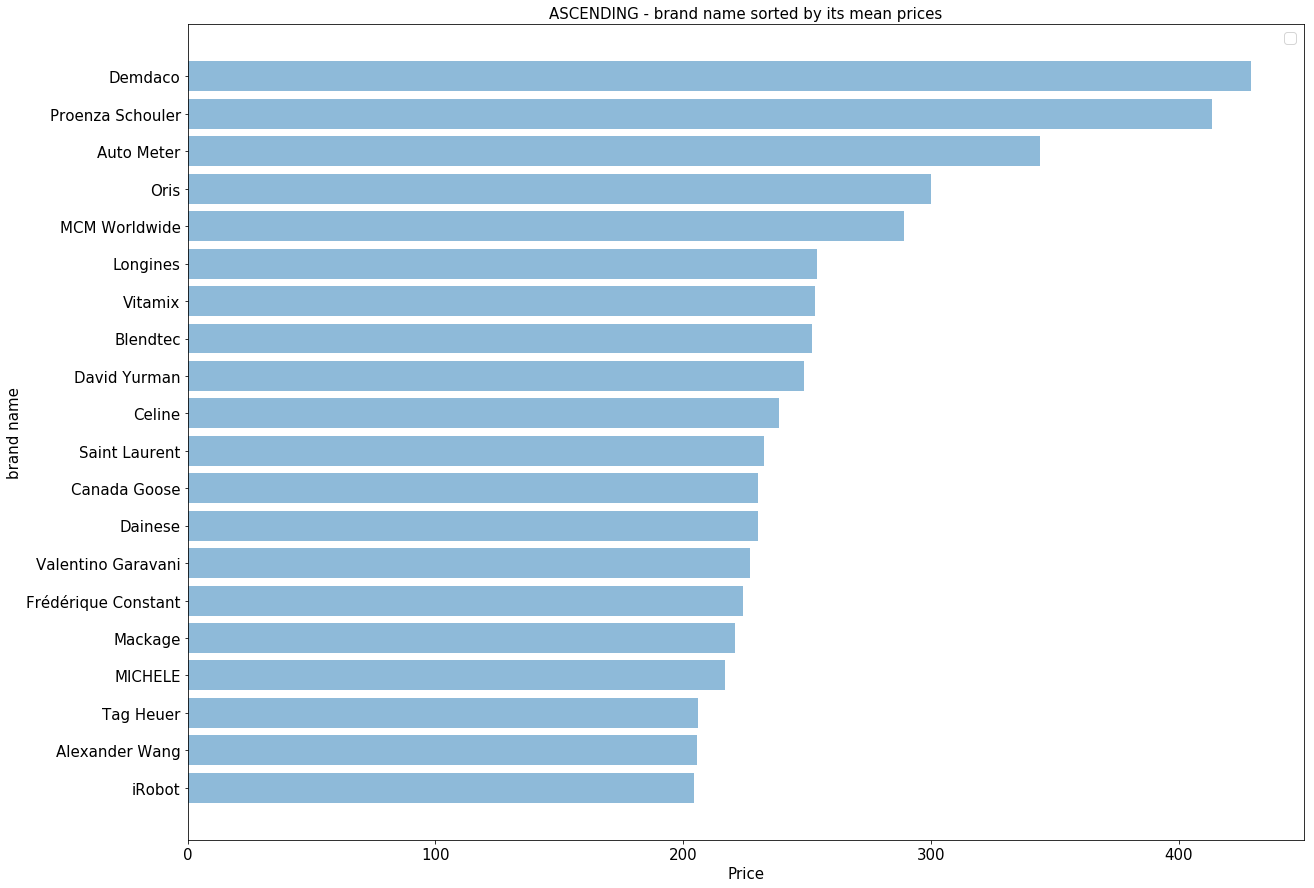

No handles with labels found to put in legend.


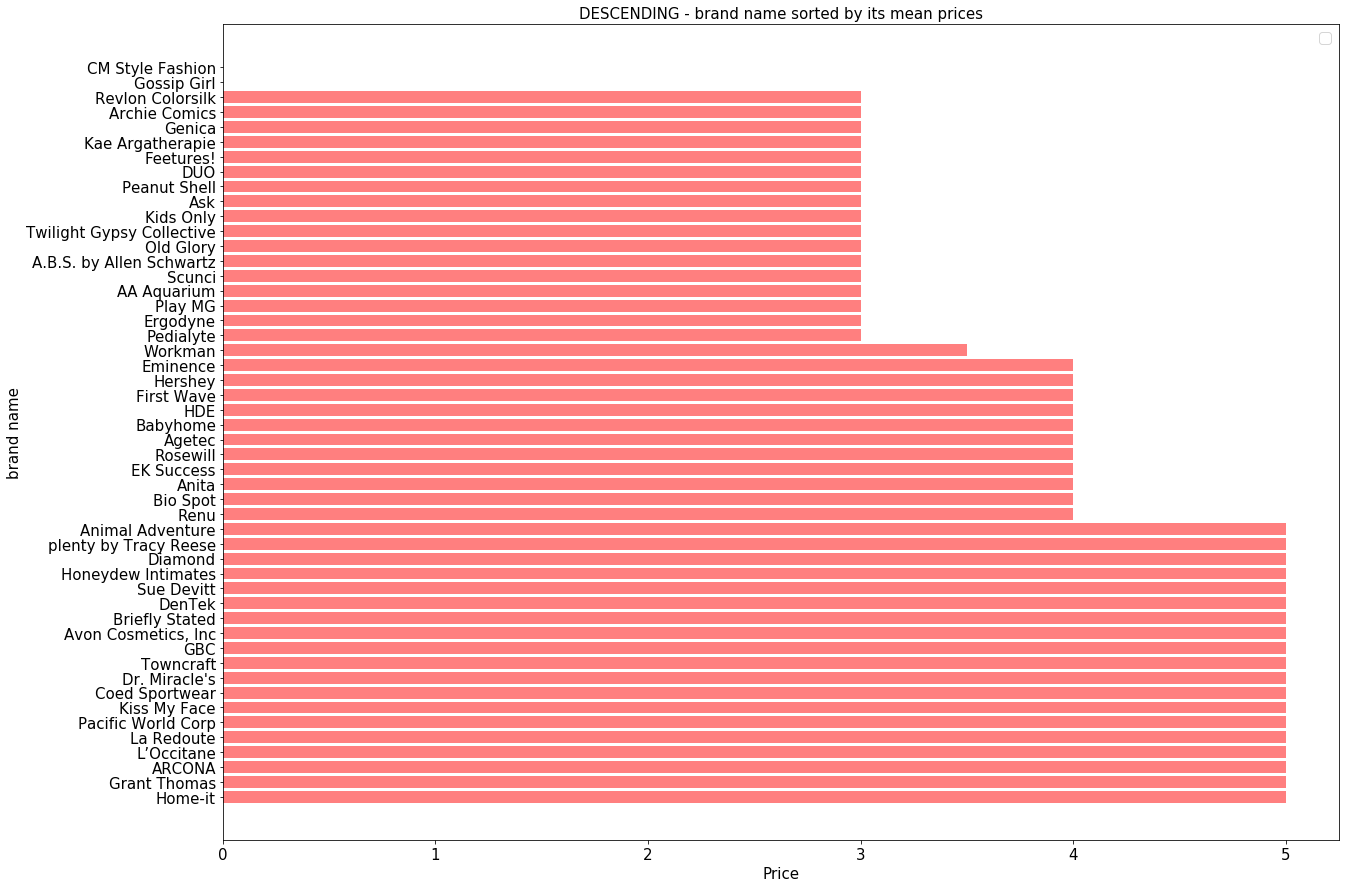

In [36]:
print('The data has {} unique brand names'.format(len(df_train['brand_name'].unique())))

df = df_train.groupby(['brand_name'])['price'].agg(['size','sum'])
df['mean_price']=df['sum']/df['size']
df.sort_values(by=['mean_price'], ascending=False, inplace=True)
df = df[:20]
df.sort_values(by=['mean_price'], ascending=True, inplace=True)

plt.figure(figsize=(20, 15))
plt.barh(range(0,len(df)), df['mean_price'], align='center', alpha=0.5)
plt.yticks(range(0,len(df)), df.index, fontsize=15)
plt.xticks(fontsize=15)
plt.title('ASCENDING - brand name sorted by its mean prices', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('brand name', fontsize=15)
plt.legend(fontsize=15)
plt.show()
########################################################################

df = df_train.groupby(['brand_name'])['price'].agg(['size','sum'])
df['mean_price']=df['sum']/df['size']
df.sort_values(by=['mean_price'], ascending=True, inplace=True)
df = df[:50]
df.sort_values(by=['mean_price'], ascending=False, inplace=True)

plt.figure(figsize=(20, 15))
plt.barh(range(0,len(df)), df['mean_price'], align='center', alpha=0.5, color='r')
plt.yticks(range(0,len(df)), df.index, fontsize=15)
plt.xticks(fontsize=15)
plt.title('DESCENDING - brand name sorted by its mean prices', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('brand name', fontsize=15)
plt.legend(fontsize=15)
plt.show()